In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/ecusa/All.csv')

C:\Users\ecusa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,1335342,12251,172.16.0.5-192.168.50.4-733-52659-17,172.16.0.5,733,192.168.50.4,52659,17,2018-11-03 10:26:35.400321,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
1,893227,19401,172.16.0.5-192.168.50.4-856-5155-17,172.16.0.5,856,192.168.50.4,5155,17,2018-11-03 10:24:44.160823,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
2,1601151,19915,172.16.0.5-192.168.50.4-543-42971-17,172.16.0.5,543,192.168.50.4,42971,17,2018-11-03 10:27:42.402790,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
3,328645,22772,172.16.0.5-192.168.50.4-900-23336-17,172.16.0.5,900,192.168.50.4,23336,17,2018-11-03 10:22:24.805530,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
4,1680296,9175,172.16.0.5-192.168.50.4-617-34434-17,172.16.0.5,617,192.168.50.4,34434,17,2018-11-03 10:28:01.942116,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018221,256219,304825,172.16.0.5-192.168.50.4-43758-34342-6,172.16.0.5,43758,192.168.50.4,34342,6,2018-11-03 11:29:28.919890,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
1018222,70727,80735,172.16.0.5-192.168.50.4-40010-35873-17,172.16.0.5,40010,192.168.50.4,35873,17,2018-11-03 11:01:56.100418,106556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
1018223,157226,586733,172.16.0.5-192.168.50.4-39985-39210-6,172.16.0.5,39985,192.168.50.4,39210,6,2018-11-03 11:29:20.677154,7000135,...,0.0,1.0,1.0,7000134.0,0.0,7000134.0,7000134.0,0,1,Syn
1018224,657214,237360,172.16.0.5-192.168.50.4-36882-32220-6,172.16.0.5,36882,192.168.50.4,32220,6,2018-11-03 11:30:18.026368,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
df['DataType'] = 0

In [6]:
df['DataType'].loc[df[' Label'] == 'BENIGN'] = 1

C:\Users\ecusa\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
print(df['DataType'])

0          0
1          0
2          0
3          0
4          0
          ..
1018221    0
1018222    0
1018223    0
1018224    0
1018225    0
Name: DataType, Length: 1018226, dtype: int64


In [8]:
df['DataType'].describe()

count    1.018226e+06
mean     2.752827e-03
std      5.239515e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: DataType, dtype: float64

In [9]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC()

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

label_encoder = LabelEncoder()


df = df.select_dtypes(include=numerics)

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', ' Source Port', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Lengt

In [13]:
df_X = df.loc[:,:' Inbound']
df_X = df_X.columns
df_X

Index(['Unnamed: 0', 'Unnamed: 0.1', ' Source Port', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Lengt

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

X = df[df_X]
y = df['DataType']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\ecusa\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [15]:
df[' Inbound'].describe()

count    977870.000000
mean          0.997338
std           0.051525
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name:  Inbound, dtype: float64

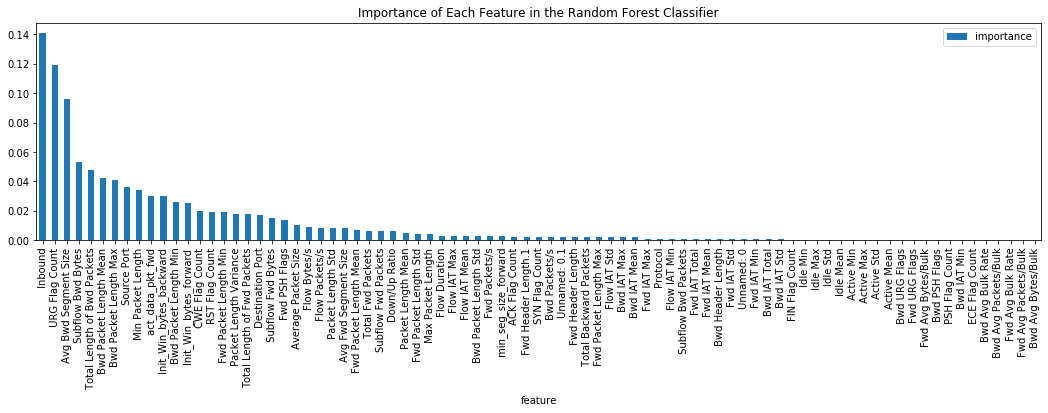

In [16]:
import numpy as np
rfc = RFC();

# fit random forest classifier on the training set
rfc.fit(train_X, train_y);

# extract important features
score_rfc = np.round(rfc.feature_importances_, 3)
importances_rfc = pd.DataFrame({'feature':train_X.columns,'importance':score_rfc})
importances_rfc = importances_rfc.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (18, 4)
#importances_rfc.plot.bar();
importances_rfc.plot.bar(title = 'Importance of Each Feature in the Random Forest Classifier')

In [17]:
df['DataType'].loc[df['DataType'] == 0] = 'ATTACK'
df['DataType'].loc[df['DataType'] == 1] = 'BENIGN'

C:\Users\ecusa\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
from sklearn.ensemble import AdaBoostClassifier as ABC
abc = ABC()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()
from sklearn.neural_network import MLPClassifier as MLPC
mlpc = MLPC()

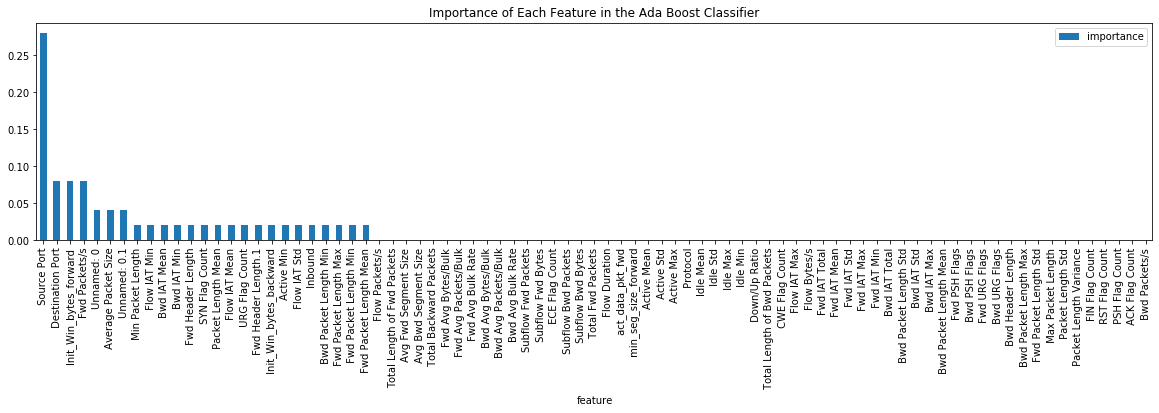

In [19]:
# fit random forest classifier on the training set
abc.fit(train_X, train_y);

# extract important features
score_abc = np.round(abc.feature_importances_, 3)
importances_abc = pd.DataFrame({'feature':train_X.columns,'importance':score_abc})
importances_abc = importances_abc.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (20, 4)
#importances_abc.plot.bar();
importances_abc.plot.bar(title = 'Importance of Each Feature in the Ada Boost Classifier')

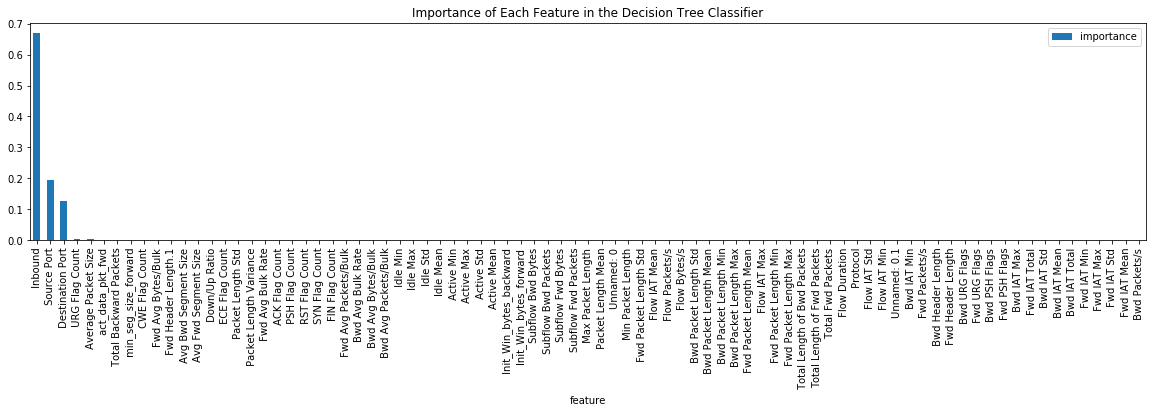

In [20]:
# fit random forest classifier on the training set
dtc.fit(train_X, train_y);

# extract important features
score_dtc = np.round(dtc.feature_importances_, 3)
importances_dtc = pd.DataFrame({'feature':train_X.columns,'importance':score_dtc})
importances_dtc = importances_dtc.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (20, 4)
#importances_dtc.plot.bar();
importances_dtc.plot.bar(title = 'Importance of Each Feature in the Decision Tree Classifier')

In [17]:
rfc_features = [' Inbound', ' URG Flag Count', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Avg Bwd Segment Size', 
               ' Subflow Bwd Bytes', ' Source Port', ' Fwd Packet Length Min', ' Total Length of Bwd Packets', 
                'Init_Win_bytes_forward', ' Bwd Packet Length Min', ' Init_Win_bytes_backward', ' Subflow Fwd Bytes',
               ' CWE Flag Count', ' Min Packet Length']

In [18]:
X = df[rfc_features]
y = df['DataType']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
rfc = RFC()


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
rfc_model = rfc.fit(train_X, train_y)
rfc_preds = rfc.predict(val_X)
precision_recall_fscore_support(rfc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(rfc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
abc_model = abc.fit(train_X, train_y)
abc_preds = abc.predict(val_X)
precision_recall_fscore_support(abc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(abc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
gnb_model = gnb.fit(train_X, train_y)
gnb_preds = gnb.predict(val_X)
precision_recall_fscore_support(gnb_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(gnb_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
%time dtc.fit(train_X, train_y)
dtc_preds = dtc.predict(val_X)
precision_recall_fscore_support(dtc_preds, val_y, average='macro')

scores = cross_val_score(dtc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [19]:
mlpc_model = mlpc.fit(train_X, train_y)
mlpc_preds = mlpc.predict(val_X)


C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NameError: name 'precision_recall_fscore_support' is not defined

In [23]:
precision_recall_fscore_support(mlpc_preds, val_y, average='macro')

scores = cross_val_score(mlpc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.999092414844909

In [ ]:
importances_abc

In [ ]:
importances_abc.head(15)

In [24]:
abc_features = [' Source Port', ' Destination Port', 'Init_Win_bytes_forward', 'Fwd Packets/s', 'Unnamed: 0', 
                ' Average Packet Size', ' Fwd Header Length', 'Unnamed: 0.1', ' Min Packet Length', ' Flow IAT Min',
                 ' Bwd IAT Mean', ' Bwd IAT Min', ' SYN Flag Count', ' Packet Length Mean', ' Flow IAT Mean']

In [25]:
X = df[abc_features]
y = df['DataType']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=1)

In [26]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
rfc_model = rfc.fit(train_X, train_y)
rfc_preds = rfc.predict(val_X)
precision_recall_fscore_support(rfc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(rfc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
abc_model = abc.fit(train_X, train_y)
abc_preds = abc.predict(val_X)
precision_recall_fscore_support(abc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(abc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
gnb_model = gnb.fit(train_X, train_y)
gnb_preds = gnb.predict(val_X)
precision_recall_fscore_support(gnb_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(gnb_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
dtc_model = dtc.fit(train_X, train_y)
dtc_preds = dtc.predict(val_X)
precision_recall_fscore_support(dtc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(dtc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [27]:
mlpc_model = mlpc.fit(train_X, train_y)
mlpc_preds = mlpc.predict(val_X)
precision_recall_fscore_support(mlpc_preds, val_y, average='macro')

scores = cross_val_score(mlpc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9971813738185654

In [ ]:
importances_dtc.head(19)

In [ ]:
df[' RST Flag Count'].describe()

In [28]:
dtc_features = [' Inbound', ' Source Port', ' Destination Port', ' ACK Flag Count', ' act_data_pkt_fwd',
               ' Max Packet Length', ' Subflow Bwd Packets', ' min_seg_size_forward', ' RST Flag Count',
                ' SYN Flag Count', ' URG Flag Count',' CWE Flag Count', ' URG Flag Count', ' Idle Max',
               ' RST Flag Count']

In [29]:
X = df[dtc_features]
y = df['DataType']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
rfc_model = rfc.fit(train_X, train_y)
rfc_preds = rfc.predict(val_X)


In [ ]:
precision_recall_fscore_support(rfc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(rfc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
abc_model = abc.fit(train_X, train_y)
abc_preds = abc.predict(val_X)
precision_recall_fscore_support(abc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(abc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
gnb_model = gnb.fit(train_X, train_y)
gnb_preds = gnb.predict(val_X)
precision_recall_fscore_support(gnb_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(gnb_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
dtc_model = dtc.fit(train_X, train_y)
dtc_preds = dtc.predict(val_X)
precision_recall_fscore_support(dtc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(dtc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [30]:
mlpc_model = mlpc.fit(train_X, train_y)
mlpc_preds = mlpc.predict(val_X)
precision_recall_fscore_support(mlpc_preds, val_y, average='macro')

scores = cross_val_score(mlpc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

0.9974472576405997

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sn

In [ ]:
avg_precision = [0.987470821895, 0.96237849568118, 0.61646131725208, 0.98542100062365, 0.62610638634205]

In [ ]:
models = ['RFC', 'ABC', 'GNB', 'DTC', 'MLPC']

In [ ]:
avg_recall = [0.9975335113291, 0.9786437440428, 0.61973384679268, 0.99726665082298, 0.97051494391608]

In [ ]:
import numpy as np
data = [avg_precision, avg_recall]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.125, data[0], color = 'b', width = 0.25, label = 'Precision')
ax.bar(X + 0.125, data[1], color = 'g', width = 0.25, label = 'Recall')
#ax.bar(X + 0.25, data[2], color = 'r', width = 0.25, label = 'Time used to fit model')
models = ['none', 'RFC', 'ABC', 'GNB', 'DTC', 'MLPC']
#legend('Precision', 'Recall', 'Time')
ax.set_xticklabels(models)
leg = ax.legend()
plt.xlabel('Model')
plt.title('Average Precision and Recall for Each Model over Four Feature Sets')
#plt.yscale('log')


In [ ]:
avg_time = [103.5, 71.875, 0.81425, 3.73, 1766.25]

In [ ]:
import numpy as np
data = [avg_time]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.bar(X - 0.25, data[0], color = 'b', width = 0.25, label = 'Precision')
#ax.bar(X, data[1], color = 'g', width = 0.25, label = 'Recall')
ax.bar(X, data[0], color = 'r', width = 0.25, label = 'Time used to fit model')
models = ['none', 'RFC', 'ABC', 'GNB', 'DTC', 'MLPC']
#legend('Precision', 'Recall', 'Time')
ax.set_xticklabels(models)
leg = ax.legend()
plt.title('Average Time used to Fit Each Model over Four Feature Sets in Seconds')
plt.rcParams['figure.figsize'] = (6, 4)
plt.ylim(0, 200)
plt.ylabel('Seconds')
plt.xlabel('Model')
#plt.yscale('log')


In [31]:
paper_features = [' Flow Duration', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
                 ' Fwd Packet Length Mean', ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
                 ' Flow IAT Mean', ' Bwd Packets/s', ' Average Packet Size', ' Active Std', ' Active Max',
                 ' Active Min']

In [32]:
X = df[paper_features]
y = df['DataType']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
rfc_model = rfc.fit(train_X, train_y)
rfc_preds = rfc.predict(val_X)
precision_recall_fscore_support(rfc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(rfc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
abc_model = abc.fit(train_X, train_y)
abc_preds = abc.predict(val_X)
precision_recall_fscore_support(abc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(abc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
gnb_model = gnb.fit(train_X, train_y)
gnb_preds = gnb.predict(val_X)
precision_recall_fscore_support(gnb_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(gnb_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [ ]:
dtc_model = dtc.fit(train_X, train_y)
dtc_preds = dtc.predict(val_X)
precision_recall_fscore_support(dtc_preds, val_y, average='macro')

In [ ]:
scores = cross_val_score(dtc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

In [33]:
mlpc_model = mlpc.fit(train_X, train_y)
mlpc_preds = mlpc.predict(val_X)
precision_recall_fscore_support(mlpc_preds, val_y, average='macro')

scores = cross_val_score(mlpc_model, train_X, train_y, cv=5)
sum = 0
for i in scores:
    sum += i
avg = sum/5
avg

C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ecusa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

0.9986437356526767

In [34]:
precision_recall_fscore_support(mlpc_preds, val_y, average='macro')

(0.7831832918529664, 0.9649593560267296, 0.8518739923488119, None)

In [20]:
from sklearn.metrics import precision_recall_fscore_support

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [35]:
scores

array([0.99881759, 0.99845327, 0.99885593, 0.99873449, 0.9983574 ])